In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

##### Automate the process of optimizing w and b using gradient descent.

In [2]:
# Load our data set

x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [ ]:
# Define cost function

def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    
    total_cost = (1/(2*m)) * cost_sum

    return total_cost

In [ ]:
# Define gradient function

def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """

    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [5]:
# Implement gradient descent

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    print(f"Iteration 0 | w: {w_in:.2f}, b: {b_in:.2f} | Cost: {cost_function(x, y, w_in, b_in):.2f}")

    for i in range(num_iters):
        w_in -= alpha * gradient_function(x, y, w_in, b_in)[0]
        b_in -= alpha * gradient_function(x, y, w_in, b_in)[1]
        print(f"Iteration {i+1} | w: {w_in:.2f}, b: {b_in:.2f} | Cost: {cost_function(x, y, w_in, b_in):.2f}")
    
    w_pred = w_in
    b_pred = b_in

    return w_pred, b_pred

In [6]:
gradient_descent(x_train, y_train, 0, 0, 0.01, 10000, compute_cost, compute_gradient)

Iteration 0 | w: 0.00, b: 0.00 | Cost: 85000.00
Iteration 1 | w: 6.50, b: 3.90 | Cost: 79312.48
Iteration 2 | w: 12.78, b: 7.67 | Cost: 74005.57
Iteration 3 | w: 18.84, b: 11.31 | Cost: 69053.81
Iteration 4 | w: 24.70, b: 14.83 | Cost: 64433.42
Iteration 5 | w: 30.36, b: 18.22 | Cost: 60122.24
Iteration 6 | w: 35.83, b: 21.51 | Cost: 56099.57
Iteration 7 | w: 41.11, b: 24.67 | Cost: 52346.10
Iteration 8 | w: 46.21, b: 27.73 | Cost: 48843.82
Iteration 9 | w: 51.14, b: 30.69 | Cost: 45575.91
Iteration 10 | w: 55.90, b: 33.54 | Cost: 42526.69
Iteration 11 | w: 60.50, b: 36.30 | Cost: 39681.53
Iteration 12 | w: 64.95, b: 38.96 | Cost: 37026.77
Iteration 13 | w: 69.24, b: 41.54 | Cost: 34549.67
Iteration 14 | w: 73.38, b: 44.02 | Cost: 32238.34
Iteration 15 | w: 77.39, b: 46.42 | Cost: 30081.68
Iteration 16 | w: 81.26, b: 48.73 | Cost: 28069.35
Iteration 17 | w: 85.00, b: 50.97 | Cost: 26191.68
Iteration 18 | w: 88.61, b: 53.13 | Cost: 24439.67
Iteration 19 | w: 92.09, b: 55.22 | Cost: 2280

(199.99403673949487, 100.00964679931117)

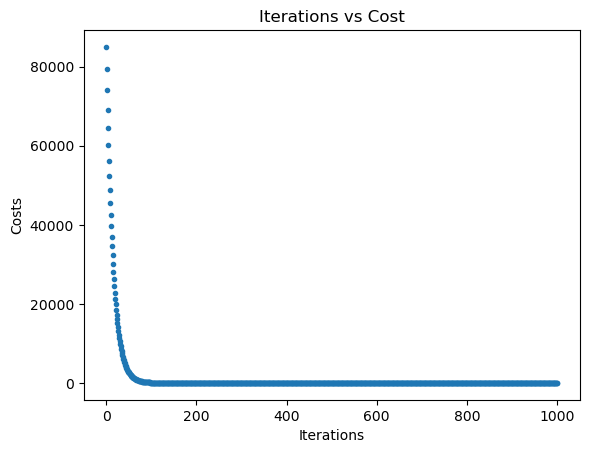

In [24]:
# Define function to plot iterations vs cost graph

def iterations_vs_cost_plot(x, y, num_iters, costs, w_in, b_in, alpha, gradient_function, compute_cost):
    
    costs = np.array([compute_cost(x_train, y_train, w_in, b_in)])  # Initial cost

    for i in range(num_iters):
        # Update weights and bias using gradient descent
        w_in -= alpha * gradient_function(x, y, w_in, b_in)[0]
        b_in -= alpha * gradient_function(x, y, w_in, b_in)[1]
        
        # Compute and store the cost
        cost = compute_cost(x, y, w_in, b_in)
        costs = np.append(costs, cost)
       
    # Plot iterations vs costs after the loop
    plt.plot(np.arange(num_iters+1), costs, marker='o', ms=3, ls='')  # Exclude initial cost
    plt.xlabel("Iterations")
    plt.ylabel("Costs")
    plt.title("Iterations vs Cost")
    plt.show()

# Example Usage
num_iters = 1000
alpha = 0.01
w_in, b_in = 0, 0  # Initial weights and bias
costs = np.array([])

iterations_vs_cost_plot(
    x_train, y_train, num_iters, costs, w_in, b_in, alpha, compute_gradient, compute_cost
)
